# Apple Podcast Recommender
> Scraping, cleaning, exploring and building content-based recommender system to recommend podcasts

- toc: true
- badges: true
- comments: true
- categories: [Visualization, Music, Scraping, TFIDF]
- author: "<a href='https://github.com/Peter-Chong/Podcast-Recommendation-System'>Peter Chong</a>"
- image:

## Scraping

Theese are the scraping scripts:

1. [podcast_ep_scraper.py](https://github.com/sparsh-ai/Podcast-Recommendation-System/blob/main/scraper/podcast_ep_scraper.py)
2. [podcast_info_scraper.py](https://github.com/sparsh-ai/Podcast-Recommendation-System/blob/main/scraper/podcast_info_scraper.py)
3. [podcast_review_scraper.py](https://github.com/sparsh-ai/Podcast-Recommendation-System/blob/main/scraper/podcast_review_scraper.py)
4. [podcast_subs_scraper.py](https://github.com/sparsh-ai/Podcast-Recommendation-System/blob/main/scraper/podcast_subs_scraper.py)
5. [podcast_url_scraper.py](https://github.com/sparsh-ai/Podcast-Recommendation-System/blob/main/scraper/podcast_url_scraper.py)

These scripts scraped the data from Apple Podcasts using BeautifulSoup (BS4) and stored as JSON. I ran these scripts to validate and they all are working correctly. It would take at least 5 hrs to finish.

## Cleaning

In [7]:
import re
import json
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', None)

In [23]:
!git clone https://github.com/Peter-Chong/Podcast-Recommendation-System.git
!mv /content/Podcast-Recommendation-System/data/json/*.json /content

### Merge podcast_info datasets

In [24]:
with open('podcast_info.json') as file:
  podcast_1 = json.load(file)

In [25]:
with open('podcast_info_add.json') as file:
  podcast_2 = json.load(file)

In [26]:
df1 = pd.DataFrame(podcast_1)
df2 = pd.DataFrame(podcast_2)
print(df1.shape)
print(df2.shape)

(4549, 8)
(427, 8)


In [27]:
df1.drop(df1[df1.title == ""].index, inplace=True)
print(df1.shape)

(4122, 8)


In [28]:
podcast_info = df1.append(df2, ignore_index=True, sort=False)
print(podcast_info.shape)

(4549, 8)


In [29]:
podcast_info.head(2)

title  ...                                                                     link
0     Green Eggs and Dan  ...    https://podcasts.apple.com/us/podcast/green-eggs-and-dan/id1471389934
1  Audio Poem of the Day  ...  https://podcasts.apple.com/us/podcast/audio-poem-of-the-day/id270054094

[2 rows x 8 columns]

### Merge podcast_eps datasets

In [30]:
with open('podcast_eps.json') as file:
  podcast_1 = json.load(file)

In [31]:
with open('podcast_eps_add.json') as file:
  podcast_2 = json.load(file)

In [32]:
df1 = pd.DataFrame(podcast_1)
df2 = pd.DataFrame(podcast_2)
print(df1.shape)
print(df2.shape)

(4460, 2)
(59, 2)


In [33]:
df1.drop(df1[df1.episodes == ""].index, inplace=True)
print(df1.shape)

(4401, 2)


In [34]:
podcast_ep = df1.append(df2, ignore_index=True, sort=False)
print(podcast_ep.shape)

(4460, 2)


In [35]:
podcast_ep.head(2)

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

### Merge podcast_reviews datasets

In [38]:
with open('podcast_reviews.json') as file:
  podcast_1 = json.load(file)

In [39]:
with open('podcast_reviews_add.json') as file:
  podcast_2 = json.load(file)

In [40]:
df1 = pd.DataFrame(podcast_1)
df2 = pd.DataFrame(podcast_2)
print(df1.shape)
print(df2.shape)

(4460, 2)
(63, 2)


In [41]:
df1.drop(df1[df1.reviews == ""].index, inplace=True)
print(df1.shape)

(4397, 2)


In [42]:
podcast_reviews = df1.append(df2, ignore_index=True, sort=False)
print(podcast_reviews.shape)

(4460, 2)


In [43]:
podcast_reviews.head(2)

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviews
0     Green Eggs and Dan   Dan is a fantastic host that draws out answers people want to know from his unique guests. Sometimes they are funny, sometimes they are inspiring, and sometimes you learn something you did not know about the restaurant industry! While this podcast does, admittedly, come across as a bit more pretentious than it probably means to be, it is still a great listen. As a lover of comedy and comedians

### Clean podcast_subs dataset

In [44]:
with open('podcast_subs.json') as file:
  podcast_subs = pd.DataFrame(json.load(file))

In [45]:
titles = list(podcast_subs.title)

In [46]:
for index, row in podcast_subs.iterrows():
    new = []
    for i in row.subs:
        if i in titles:
            new.append(i)
    podcast_subs.at[index, 'subs'] = new

In [47]:
print(podcast_subs.shape)

(4460, 2)


In [48]:
podcast_subs.head(2)

title                                                                                                                                                        subs
0     Green Eggs and Dan                                                                                                                     [Point of Origin, Cal's Week in Review]
1  Audio Poem of the Day  [The New Yorker: Poetry, The New Yorker: The Writer's Voice - New Fiction from The New Yorker, The New Yorker: Fiction, Selected Shorts, The Paris Review]

### Merge all datasets

In [49]:
df1 = pd.merge(podcast_info, podcast_ep, on="title", how="inner")

In [50]:
df2 = pd.merge(df1, podcast_reviews, on="title", how="inner")

In [51]:
df = pd.merge(df2, podcast_subs, on="title", how="inner")

In [52]:
df.head(2)

title  ...                                                                                                                                                        subs
0     Green Eggs and Dan  ...                                                                                                                     [Point of Origin, Cal's Week in Review]
1  Audio Poem of the Day  ...  [The New Yorker: Poetry, The New Yorker: The Writer's Voice - New Fiction from The New Yorker, The New Yorker: Fiction, Selected Shorts, The Paris Review]

[2 rows x 11 columns]

In [53]:
df.shape

(4470, 11)

### Duplicates

In [54]:
df[df.duplicated(subset=['title'], keep=False)]

title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    subs
49    The Jeselnik & Rosenthal Vanity Project  ...                                                                                                                                                                                                                                                                                                                              [The HoneyDew with Ryan Sickler, The Bill Bert Podcast, Whiskey Ginger w/ Andrew Santino, Dr. Drew After Dark, 2 Bears 1 Cave with Tom Segura & Bert Kreischer, KILL TONY]
50    The Jeselnik & Rosenthal Vanity Project  ...                                                                                                                                                                                                                                                                                                                              [The HoneyDew with Ryan Sickler, The Bill Bert Podcast, Whiskey Ginger w/ Andrew Santino, Dr. Drew After Dark, 2 Bears 1 Cave with Tom Segura & Bert Kreischer, KILL TONY]
511                                 SmartLess  ...                                                                                                                                                                                                                                                                                                                                                                      [Mike Birbiglia's Working It Out, HBO's I'll Be Gone In The Dark Podcast, Netflix Is A Daily Joke, PANTS     with Kate and Leisha]
512                                 SmartLess  ...                                                                                                                                                                                                                                                                                                                                                                      [Mike Birbiglia's Working It Out, HBO's I'll Be Gone In The Dark Podcast, Netflix Is A Daily Joke, PANTS     with Kate and Leisha]
1403                          Radio Headspace  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                             [The Last Archive, Netflix Is A Daily Joke]
1404                          Radio Headspace  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                             [The Last Archive, Netflix Is A Daily Joke]
1718                                Blindspot  ...                                                                                                                                                                                                                         

In [55]:
df.drop([50, 512, 1403, 1718, 2124, 2198, 2371, 2688, 3628, 4369], inplace=True)

In [56]:
df[df.duplicated(subset=['title'], keep=False)]

Empty DataFrame
Columns: [title, producer, genre, rating, num_ratings, num_episodes, description, link, episodes, reviews, subs]
Index: []

In [57]:
df.shape

(4460, 11)

### English titles

In [58]:
titles = list(df['title'])
titles = [title.replace(" ", "") for title in titles]
titles = [re.sub(r'[^\w\s]', '', title) for title in titles]
is_english = [bool(re.match("^[A-Za-z0-9]*$", title)) for title in titles]

In [59]:
df = df.loc[is_english, :]

In [60]:
df.shape

(4460, 11)

In [61]:
df.reset_index(drop=True, inplace=True)

In [62]:
def clean_description(desc):
    desc = re.sub(r"http\S+", "", desc)
    desc = re.sub(r"www\S+", "", desc)
    desc = re.sub(r"\S+\.com\S+", "", desc)
    return desc

In [63]:
df['description'] = df['description'].map(clean_description)
df['episodes'] = df['episodes'].map(clean_description)

In [64]:
def clean_reviews(review):
    review = re.sub(r"http\S+", "", review)
    review = re.sub(r"www\S+", "", review)
    review = re.sub(r"\S+\.com\S+", "", review)
    review = review.replace('\n',' ')
    return review

In [65]:
df['reviews'] = df['reviews'].map(clean_reviews)

In [66]:
df.sample(2)

title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        subs
688   Knowledge Fight  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                      [QAnon Anonymous, The West Wing Thing, TrueAnon, D&D Minus, Well There's Your Problem]
1997    Story Pirates  ...  [Circle Round, Tumble Science Podcast for Kids, But Why: A Podcast for Curious Kids, Brains On! Science podcast for kids, Stories Podcast: A Bedtime Show for Kids of All Ages, Wow in the World, The Alien Adventures of Finn Caspian: Science Fiction for Kids, What If World - Stories for Kids, Story Time, The Unexplainable Disappearance of Mars Patel, Storynory - Audio Stories For Kids, Good Night Stories for Rebel Girls, Little Stories for Tiny People: Anytime and bedtime stories for kids, Six Minutes, Smash Boom Best]

[2 rows x 11 columns]

In [67]:
df.to_pickle('podcasts.pkl')

## EDA

In [68]:
import pandas as pd
import networkx as nx
import plotly.express as px
import plotly.graph_objs as go

In [69]:
df = pd.read_pickle('podcasts.pkl')

In [70]:
df.sample(2)

title  ... subs
1276                  Legal Docket  ...   []
4065  Mea Culpa with Michael Cohen  ...   []

[2 rows x 11 columns]

In [71]:
print("Total # of podcasts:", df.shape[0])

Total # of podcasts: 4460


### Genre

In [72]:
df.genre.value_counts()

News                       240
TV & Film                  239
Sports                     239
Business                   238
True Crime                 238
Kids & Family              238
Leisure                    237
Comedy                     237
Health & Fitness           236
Religion & Spirituality    234
Science                    234
Arts                       233
Fiction                    233
Technology                 233
Society & Culture          232
History                    232
Music                      230
Government                 228
Education                  226
Relationships                1
Natural Sciences             1
Self-Improvement             1
Name: genre, dtype: int64

Since Self-Improvement, Natural Sciences and Relationships have only 1 podcast each, we change these genre into the Science, Society & Culture and Religion & Spirituality respectively

In [73]:
df.loc[df['genre'] == "Natural Sciences", 'genre'] = 'Science'
df.loc[df['genre'] == "Relationships", 'genre'] = 'Society & Culture'
df.loc[df['genre'] == "Self-Improvement", 'genre'] = 'Religion & Spirituality'

In [74]:
genre_count = df.genre.value_counts().rename_axis('Genres').reset_index(name='Count')

In [75]:
fig = px.bar(genre_count, x='Genres', y='Count', text='Count', title="Number of podcasts by Genre")
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=45, yaxis_range=[0,300])
fig.show()

In [76]:
genre = df[['genre', 'rating']]
genre_rating = genre.groupby('genre').mean().sort_values(by=['rating'], ascending=False).reset_index()

In [77]:
fig = px.bar(genre_rating, x='genre', y='rating', title="Average rating by Genre")
fig.update_layout(xaxis_tickangle=45)
fig.show()

In [78]:
fig = px.box(df, x="genre", y="num_ratings", labels={
                     "genre": "Genre",
                     "num_ratings": "Number of Ratings"
                 }, title="Boxplot of Number of Ratings")
fig.show()

We can see that there are some outliers in the number of ratings, hence we will be using median for the next graph instead of mean.

In [79]:
genre = df[['genre', 'num_ratings']]
genre_num_ratings = genre.groupby('genre').median().sort_values(by=['num_ratings'], ascending=False).reset_index()

In [80]:
fig = px.bar(genre_num_ratings, x='genre', y='num_ratings',labels={
                     "genre": "Genre",
                     "num_ratings": "Number of Ratings"
                 }, title="Median number of rating by Genre")
fig.update_layout(xaxis_tickangle=45, yaxis_range=[0,4000])
fig.show()

In [81]:
fig = px.scatter(df, x="num_episodes", y="rating", labels={
                     "rating": "Rating",
                     "num_episodes": "Number of Episodes"
                 }, title="Ratings by number of episodes")
fig.show()

I was wondering if the higher number of episode a podcast have, the higher the rating it will be. The above graph shows that I am wrong. There are podcasts with very little number of episodes but still have very high rating.

### Network Graph

Given a podcast, we know the what other subscribers of that podcast subscribes to. Hence, we can make a network visualizing it. However, since our data is too big, we will just look into one of the genre. Let's look into the Education genre.

In [82]:
# Deep copy df with Education genre
df_edu = df[df['genre'] == 'Education'].copy()

# Clean the subs column
titles = list(df_edu.title)
for index, row in df_edu.iterrows():
    new = []
    for i in row.subs:
        if i in titles:
            new.append(i)
    df_edu.at[index, 'subs'] = new

# Initialize a network graph
G = nx.Graph()

# Add nodes and edges into the network graph
node_list = set()
for index,row in df_edu.iterrows():
    if len(row.subs) == 0:
        continue
    node_list.add(row.title)
    for i in row.subs:
        node_list.add(i)
        G.add_edges_from([(row.title, i)])
for i in node_list:
    G.add_node(i)

# Extract the coordinates of nodes
pos = nx.spring_layout(G, k=0.5)

# Adding coordinates of the nodes to the graph
for name, pos in pos.items():
    G.nodes[name]['pos'] = pos

# Adding nodes to the network
node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=1))
    
# Adding  edges to the network
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Add colours to the nodes
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(adjacencies[0] + ' # of connections: '+str(len(adjacencies[1])))
node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Plot the network
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Education subscribers also subscribes to',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

### Word Cloud

In [83]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [84]:
def wordcloud(genre):
    text = ' '.join(df[df.genre == genre].description)
    tokenized_text = nltk.word_tokenize(text)
    stop = set(nltk.corpus.stopwords.words('english'))
    stop.update(['podcast', 'podcasts', 'every', 'new', 'weekly', 'week',
                'stories', 'story', 'episode', 'episodes', 'listen', 'us',
                'host', 'hosted', 'join', "'s"])
    texts = []
    for i in tokenized_text:
        if i.lower() not in stop and len(i) != 1:
            texts.append(i)
    texts = ' '.join(texts)
    
    wordcloud = WordCloud(
        background_color='white',
        max_font_size=60, 
        scale=2,
        random_state=123
    ).generate(texts)
    fig = plt.figure(1, figsize=(12, 12))
    plt.title(genre, loc='left', fontsize=20)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

In [104]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

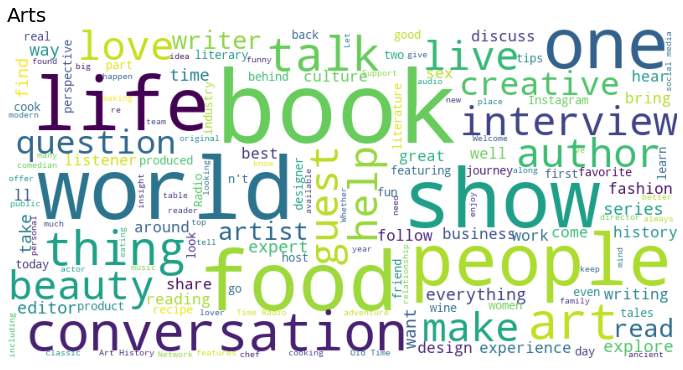

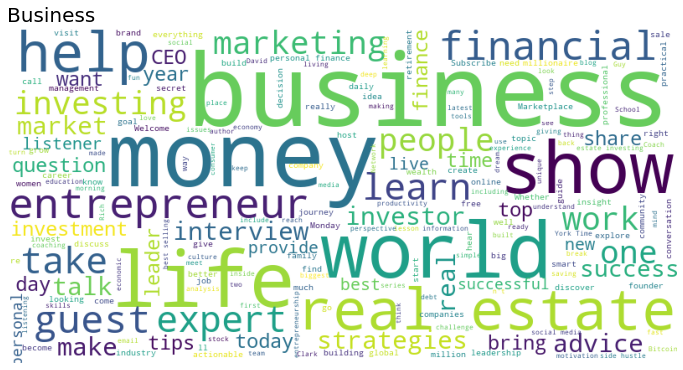

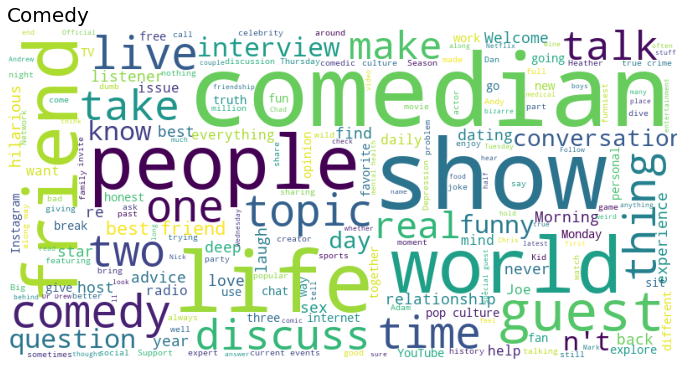

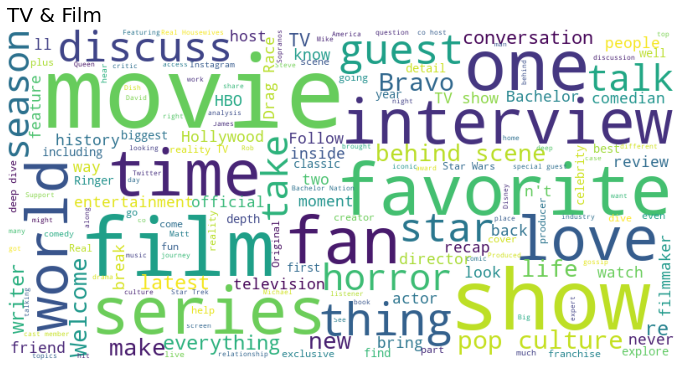

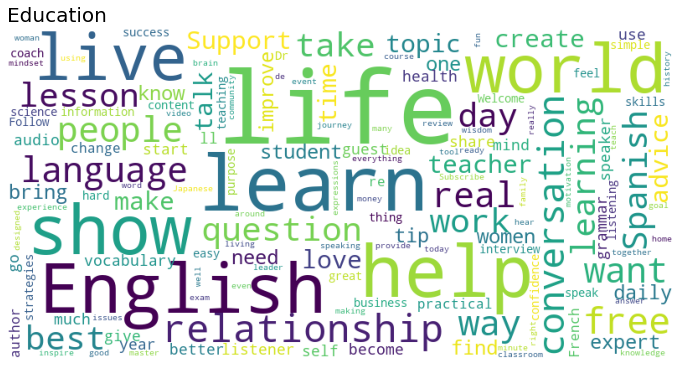

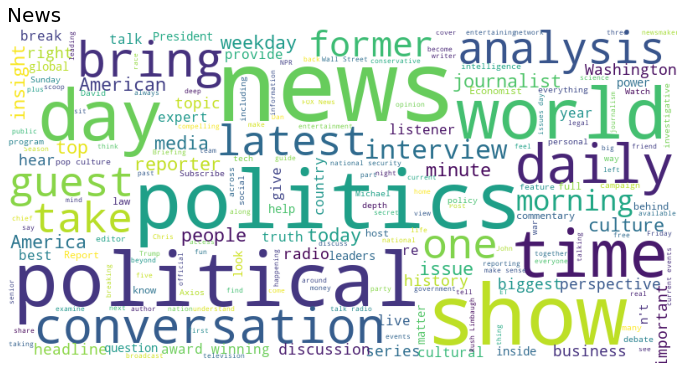

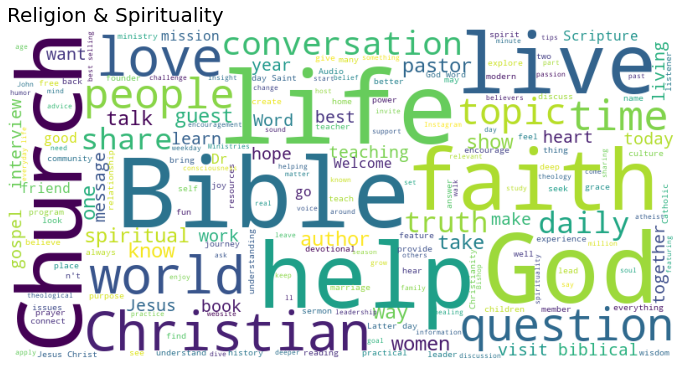

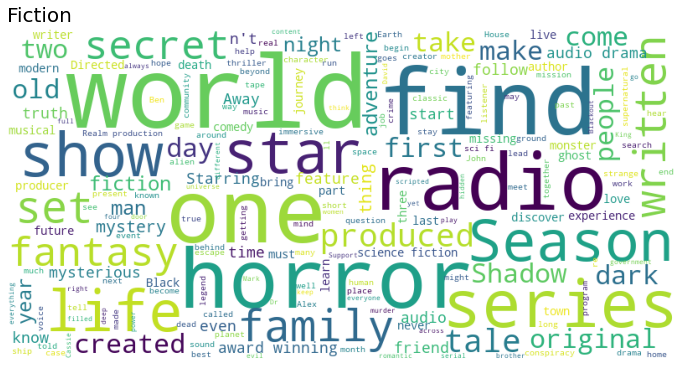

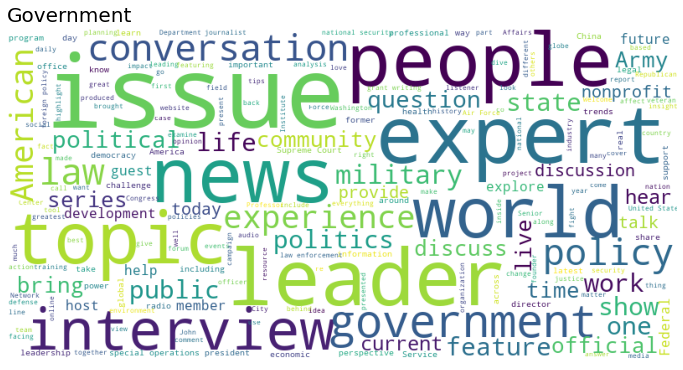

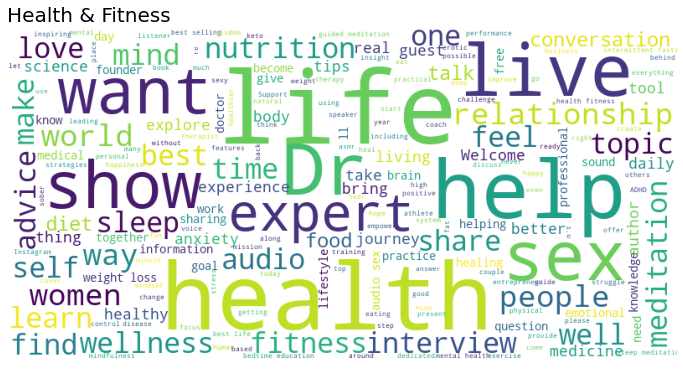

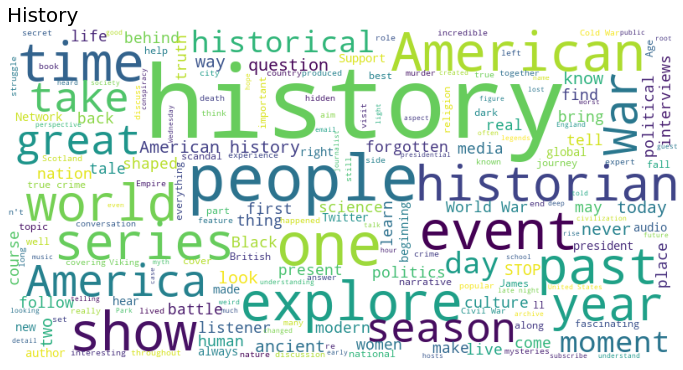

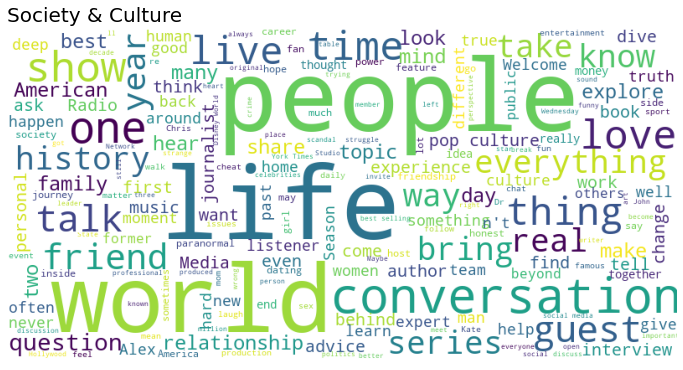

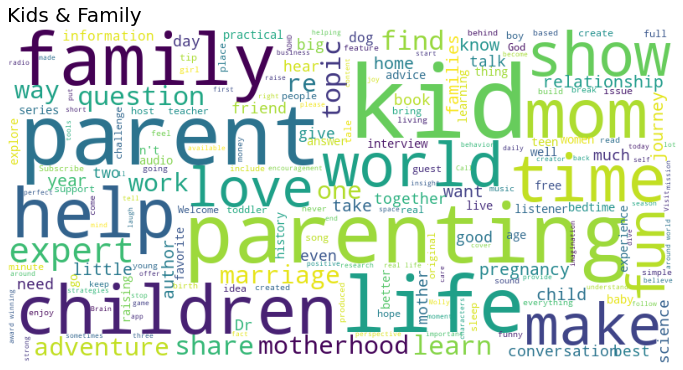

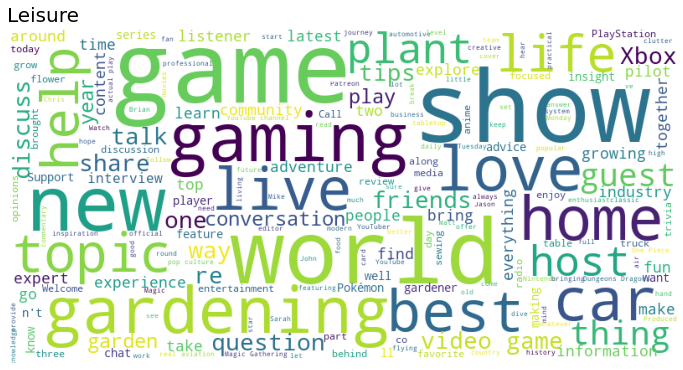

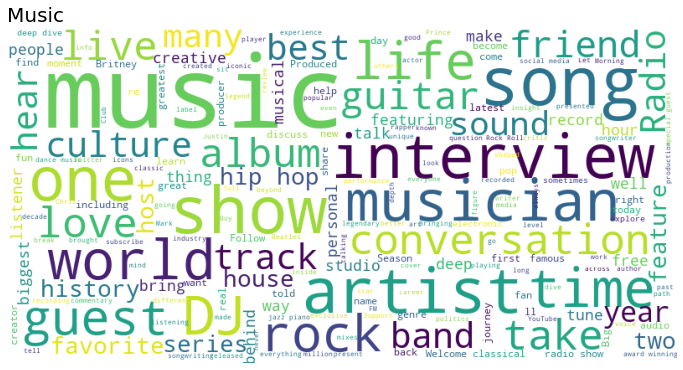

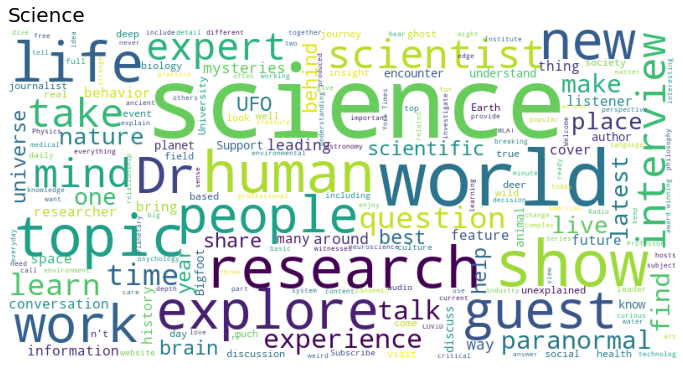

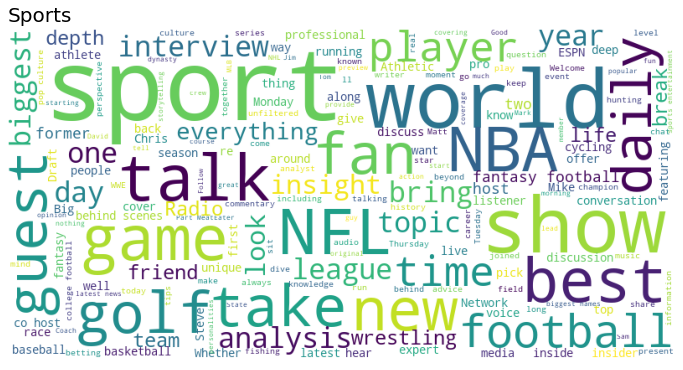

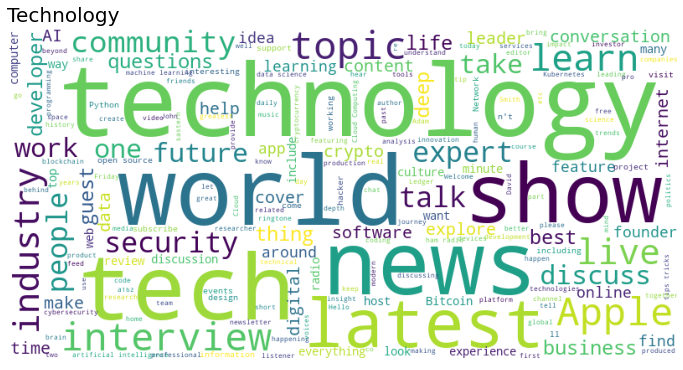

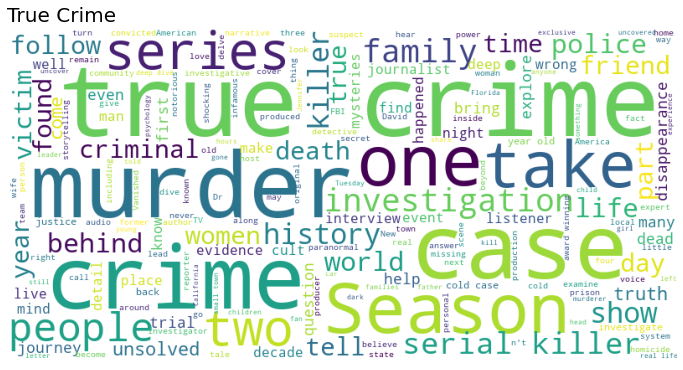

In [89]:
for i in df.genre.unique():
    wordcloud(i)

## Recommender Engine

In [ ]:
!pip install -q umap-learn

In [125]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer

import umap.umap_ as umap
import plotly.express as px

In [90]:
df = pd.read_pickle('podcasts.pkl')

In [91]:
df['text'] = df[['title', 'producer', 'genre', 'description', 'episodes', 'reviews']].agg(' '.join, axis=1)

In [92]:
df.drop(columns=['producer', 'rating', 'num_ratings', 'num_episodes', 'description',
                 'link', 'episodes', 'reviews'], inplace=True)

In [93]:
df['subs_len'] = df.apply(lambda row: len(row.subs), axis=1)

In [94]:
df.head(2)

title  ... subs_len
0     Green Eggs and Dan  ...        2
1  Audio Poem of the Day  ...        5

[2 rows x 5 columns]

In [95]:
df.shape

(4460, 5)

In [96]:
titleswsubs = list(df[df.subs_len != 0].title)

In [117]:
subsset = set()
for i in df.subs:
    for j in i:
        subsset.add(j)

### Preprocessing

In [97]:
stopwords = set(nltk.corpus.stopwords.words('english'))
add_stops = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',
             'january', 'february', 'march', 'april', 'may', 'june', 'im', 'ive',
             'july', 'august', 'september', 'october', 'november', 'december',
             'nan', 'podcast', 'podcasts', 'every', 'new', 'weekly', 'week', 
             'stories', 'story', 'episode', 'episodes', 'listen', 'us', "'s", 'host', 'hosted', 'join']
for i in add_stops:
    stopwords.add(i)

In [102]:
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\s\w]+', '', text)
    text = re.sub(r"\S+\.org\S+", "", text)
    text = re.sub(r"\S+\.net\S+", "", text)
    text = re.sub(r"\S+\.edu\S+", "", text)
    text = re.sub(r"\S+\.gov\S+", "", text)
    tokenized_text = nltk.word_tokenize(text)
    new_tokenized = []
    for i in tokenized_text:
        if i not in stopwords and len(i) != 1:
            new_tokenized.append(lemmatizer.lemmatize(i))
    return(' '.join(new_tokenized))

In [105]:
df.text = df.text.map(preprocess_text)

In [106]:
df.head(2)

title  ... subs_len
0     Green Eggs and Dan  ...        2
1  Audio Poem of the Day  ...        5

[2 rows x 5 columns]

In [107]:
classes = {
    'Arts':0, 'Business':1, 'Comedy':2, 'TV & Film':3, 'Education':4,
    'News':5, 'Self-Improvement':6, 'Fiction':7, 'Government':8, 'Health & Fitness':9,
    'History':10, 'Society & Culture':11, 'Kids & Family':12, 'Leisure':13, 'Music':14,
    'Religion & Spirituality':15, 'Science':16, 'Natural Sciences':17, 'Relationships':18,
    'Sports':19, 'Technology':20, 'True Crime':21
}

In [108]:
y_label = df.loc[:,'genre'].values
y = np.zeros((len(y_label),))
for i in range(len(y)):
    y[i] = classes[y_label[i]]

### Modelling

In [109]:
tests = list(df[df.subs_len >= 5].sample(3).title)

In [118]:
def get_recommendations(matrix):
    for i in tests:
        print('\033[1m' + "Given:" + '\033[0m', i)
        index = df.loc[df.title == i].index[0]
        print('\033[1m' + "Given genre:" + '\033[0m', df.iloc[index]['genre'])
        array = list(enumerate(matrix[index]))
        sorted_array = sorted(array, key=lambda x:x[1], reverse=True)
        recs = []
        genres = []
        for j in sorted_array:
            rec_title = df.iloc[j[0]]['title']
            rec_genre = df.iloc[j[0]]['genre']
            if rec_title == i or rec_title not in subsset:
                continue
            recs.append(rec_title)
            genres.append(rec_genre)
            if len(recs) == 5:
                break
        print('\033[1m' + "Top 5 recommendations:" + '\033[0m')
        print(recs)
        print('\033[1m' + "Top 5 recommendations' genre:" + '\033[0m')
        print(genres)
        print('\033[1m' + "Subscribers also subscribes to according to Apple Podcasts:" + '\033[0m')
        for k in df.loc[df.title == i].subs:
            substo = k
        print(substo)
        correct  = 0
        for l in recs:
            correct = correct + 1 if l in substo else correct
        print('\033[1m', correct , "out of 5 are accurate" + '\033[0m'+ "\n")

In [111]:
def accuracy(matrix):
    num_titles = len(titleswsubs)
    acc = 0
    for i in titleswsubs:
        index = df.loc[df.title == i].index[0]
        array = list(enumerate(matrix[index]))
        sorted_array = sorted(array, key=lambda x:x[1], reverse=True)
        recs = []
        for j in sorted_array:
            rec_title = df.iloc[j[0]]['title']
            if rec_title == i or rec_title not in subsset:
                continue
            recs.append(rec_title)
            if len(recs) == 5:
                break
        for k in df.loc[df.title == i].subs:
            substo = k
        correct = 0
        for l in recs:
            correct = correct + 1 if l in substo else correct
        if correct >= len(substo)//2 or correct == 5:
            acc += 1
    return round(acc/num_titles,5)

In [112]:
def showUMAP(matrix, title):
    mat_df = pd.DataFrame(matrix.toarray())
    x = mat_df.values
    embedding = umap.UMAP(n_components = 2).fit_transform(x, y=y)
    plot = pd.DataFrame(embedding)
    plot.columns = ['UMAP1', 'UMAP2']
    plot['labels'] = y_label
    fig = px.scatter(plot, x='UMAP1', y='UMAP2', color = 'labels', title=title)
    fig.update_traces(marker = dict(size=4))
    fig.show()

### CountVectorizer (Bag-of-words) + Cosine Similarity

In [113]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
bow = CountVectorizer(min_df=3)
bow_matrix = bow.fit_transform(df.text)
bow_cos_sim = cosine_similarity(bow_matrix)

In [115]:
bow_matrix.shape

(4460, 30385)

In [119]:
get_recommendations(bow_cos_sim)

Given: The Talk Show With John Gruber
Given genre: Technology
Top 5 recommendations:
['Apple Bitz XL w/ Brian Tong', 'Clockwise', 'The Bobby Bones Show', 'CBS Sunday Morning with Jane Pauley', 'iMore show']
Top 5 recommendations' genre:
['Technology', 'Technology', 'Comedy', 'News', 'Technology']
Subscribers also subscribes to according to Apple Podcasts:
['Accidental Tech Podcast', 'Upgrade', 'AppStories', 'Connected', 'Mac Power Users', '9to5Mac Happy Hour', 'iMore show', 'Clockwise', 'AppleInsider Podcast', 'Under the Radar']
 2 out of 5 are accurate

Given: Chrisley Confessions
Given genre: Kids & Family
Top 5 recommendations:
['A Beautiful Mess Podcast', 'This is Love', 'Morbid: A True Crime Podcast', 'TigerBelly', 'Comments by Celebs']
Top 5 recommendations' genre:
['Leisure', 'Society & Culture', 'Comedy', 'Comedy', 'Society & Culture']
Subscribers also subscribes to according to Apple Podcasts:
['Coffee Convos Podcast with Kail Lowry & Lindsie Chrisley', 'Whine Down with Jana K

In [120]:
accuracy(bow_cos_sim)

0.2596

In [126]:
showUMAP(bow_matrix, "CountVectorizer")

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



### TF-IDF + Cosine Similarity

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [128]:
tf = TfidfVectorizer(min_df=3)
tf_idf_matrix = tf.fit_transform(df.text)
tf_idf_cos_sim = cosine_similarity(tf_idf_matrix)

In [129]:
tf_idf_matrix.shape

(4460, 30385)

In [130]:
get_recommendations(tf_idf_cos_sim)

Given: The Talk Show With John Gruber
Given genre: Technology
Top 5 recommendations:
['The CultCast', 'Accidental Tech Podcast', '9to5Mac Happy Hour', 'AppleInsider Podcast', 'Apple Events']
Top 5 recommendations' genre:
['Technology', 'Technology', 'Technology', 'Technology', 'Technology']
Subscribers also subscribes to according to Apple Podcasts:
['Accidental Tech Podcast', 'Upgrade', 'AppStories', 'Connected', 'Mac Power Users', '9to5Mac Happy Hour', 'iMore show', 'Clockwise', 'AppleInsider Podcast', 'Under the Radar']
 3 out of 5 are accurate

Given: Chrisley Confessions
Given genre: Kids & Family
Top 5 recommendations:
['Song Vs. Song', 'Dumb Gay Politics', "God's Big Story", 'Comments by Celebs', 'Feeling Good Podcast | TEAM-CBT - The New Mood Therapy']
Top 5 recommendations' genre:
['Music', 'TV & Film', 'Kids & Family', 'Society & Culture', 'Health & Fitness']
Subscribers also subscribes to according to Apple Podcasts:
['Coffee Convos Podcast with Kail Lowry & Lindsie Chrisley

In [131]:
accuracy(tf_idf_cos_sim)

0.29493

In [132]:
showUMAP(tf_idf_matrix, "TF-IDF")